In [1]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()

In [2]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
import pandas as pd
data = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
data['target'] = dataset['target']

In [4]:
X=data.drop('target',axis=1)
y=data['target']

In [5]:
import sklearn.model_selection as train_test_split
X_train, X_test, y_train, y_test = train_test_split.train_test_split(X, y, test_size=0.3, random_state=10)

In [6]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


In [7]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Axes: >

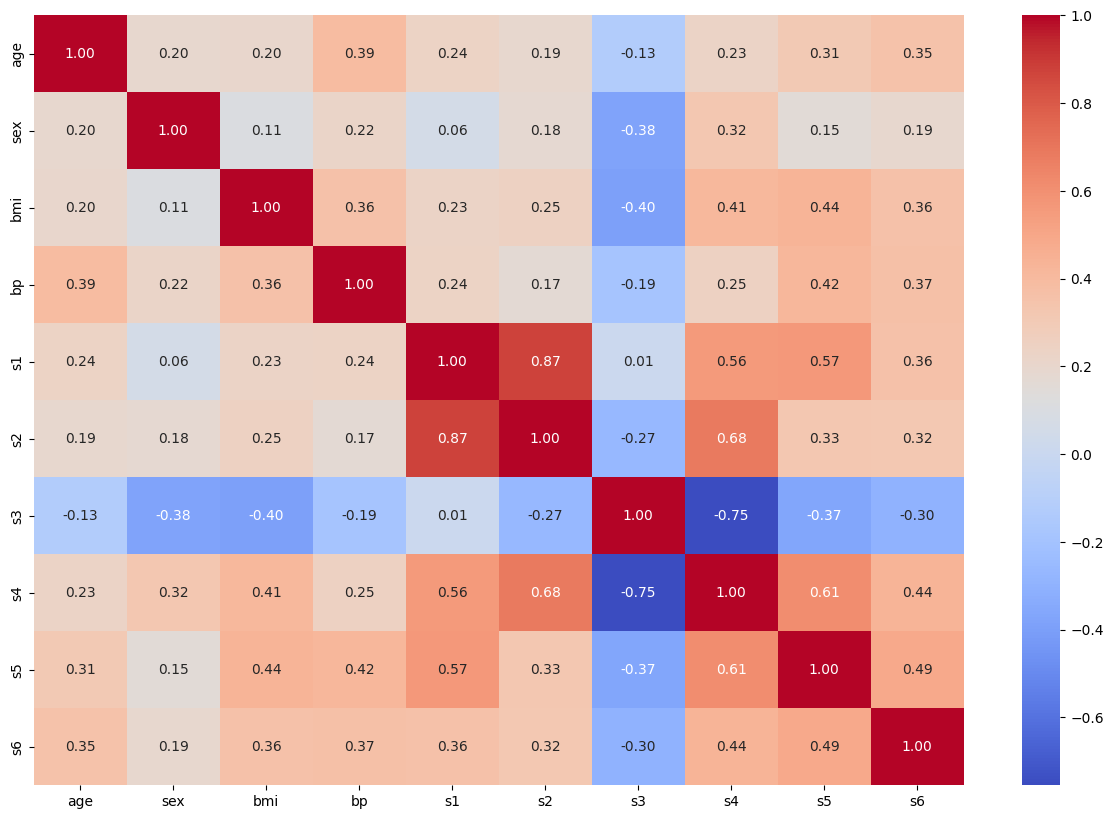

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap="coolwarm") 

In [11]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()

In [12]:
dt_regressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [13]:
param={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
       'splitter':['best', 'random'],
       'max_depth':[1,2,3,4,5,10,15,20,25,30,None],
       'min_samples_split':[2, 5, 10],
       'min_samples_leaf':[1, 2, 4],
       'max_features':['auto', 'sqrt', 'log2', None]}


In [14]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dt_regressor,
                           param_grid=param,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

In [15]:
import warnings
warnings.filterwarnings('ignore')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3168 candidates, totalling 15840 fits


,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [16]:
grid_search.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'best'}

In [18]:
y_pred = grid_search.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))  
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 5314.241392991424
Mean Absolute Error: 57.628006441520505
R2 Score: 0.16015840375066948


In [22]:
selectedmodel = DecisionTreeRegressor(criterion='squared_error', max_depth=10,  max_features=None, min_samples_leaf=2,
                                     min_samples_split=2, splitter='best')

In [23]:
selectedmodel.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.6474133261105092, 0.9545454545454546, 'x[8] <= 0.022\nsquared_error = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.45490249187432286, 0.8636363636363636, 'x[2] <= 0.005\nsquared_error = 4016.257\nsamples = 205\nvalue = 123.444'),
 Text(0.551157908992416, 0.9090909090909092, 'True  '),
 Text(0.3507583965330444, 0.7727272727272727, 'x[7] <= 0.031\nsquared_error = 2592.764\nsamples = 148\nvalue = 107.615'),
 Text(0.25947995666305523, 0.6818181818181818, 'x[0] <= 0.022\nsquared_error = 2220.402\nsamples = 127\nvalue = 101.008'),
 Text(0.17876489707475623, 0.5909090909090909, 'x[1] <= 0.003\nsquared_error = 2062.541\nsamples = 98\nvalue = 93.898'),
 Text(0.11484290357529794, 0.5, 'x[6] <= 0.05\nsquared_error = 2141.581\nsamples = 66\nvalue = 101.545'),
 Text(0.056338028169014086, 0.4090909090909091, 'x[2] <= -0.066\nsquared_error = 2477.671\nsamples = 45\nvalue = 112.867'),
 Text(0.01733477789815818, 0.3181818181818182, 'x[8] <= -0.058\nsquared_error = 566.395\nsamples = 9\nv

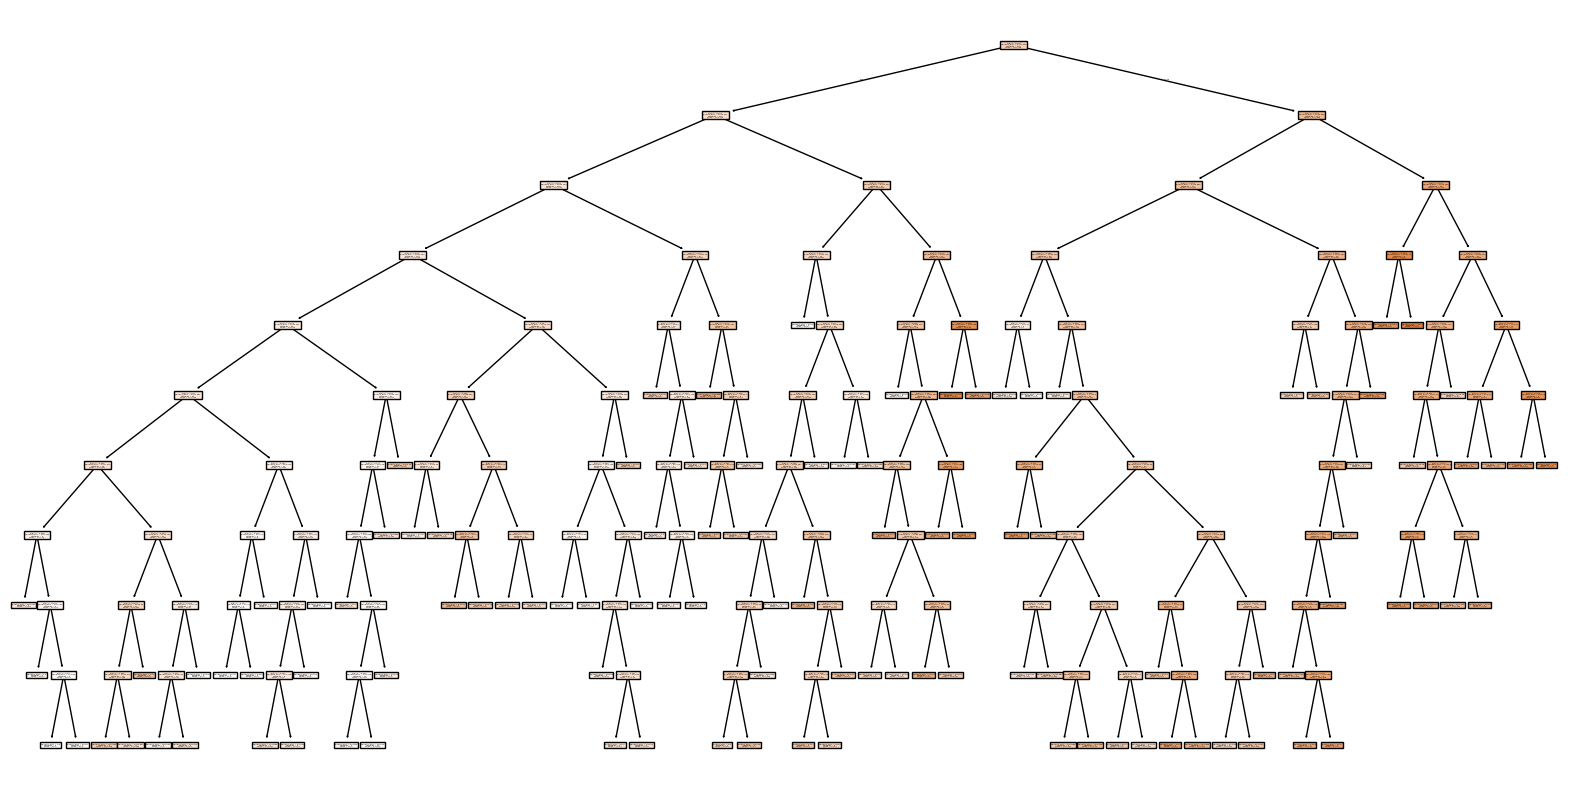

In [24]:
##Visualize DT
plt.figure(figsize=(20,10))
from sklearn import tree
tree.plot_tree(selectedmodel, filled=True)